In [1]:
import numpy as np
import catboost as cb
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [2]:
df = pd.read_excel('/home/andrews-tang/Datasets/ILS_dataset.xlsx')
df.head()

,ANGLE,DDM_T1,DDM_T2,SDM_T1,SDM_T2,DDM_T1_std,DDM_T2_std,SDM_T1_std,SDM_T2_std,Unnamed: 9,...,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24
0,35.0,33.22,32.30,40.04,39.77,35.13,33.62,40.03,39.77,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,30.0,26.87,26.44,40.08,39.92,26.93,26.79,40.04,39.93,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,25.0,22.69,24.38,40.11,40.09,22.85,24.09,40.01,40.12,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,20.0,28.45,27.77,40.07,39.96,28.25,27.52,40.03,39.94,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,15.0,38.10,34.03,40.04,39.71,38.03,34.20,40.06,39.69,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
df.columns

Index(['ANGLE', 'DDM_T1', 'DDM_T2', 'SDM_T1', 'SDM_T2', 'DDM_T1_std',
       'DDM_T2_std', 'SDM_T1_std', 'SDM_T2_std', 'Unnamed: 9', 'Unnamed: 10',
       'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13', 'Unnamed: 14',
       'Unnamed: 15', 'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18',
       'Unnamed: 19', 'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22',
       'Unnamed: 23', 'Unnamed: 24'],
      dtype='object')

In [4]:
columns_to_remove = ['Unnamed: 9', 'Unnamed: 10', 'Unnamed: 11', 
                     'Unnamed: 12', 'Unnamed: 13', 'Unnamed: 14', 
                     'Unnamed: 15', 'Unnamed: 16', 'Unnamed: 17', 
                     'Unnamed: 18', 'Unnamed: 19', 'Unnamed: 20', 
                     'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23', 
                     'Unnamed: 24']

columns_to_remove

['Unnamed: 9',
 'Unnamed: 10',
 'Unnamed: 11',
 'Unnamed: 12',
 'Unnamed: 13',
 'Unnamed: 14',
 'Unnamed: 15',
 'Unnamed: 16',
 'Unnamed: 17',
 'Unnamed: 18',
 'Unnamed: 19',
 'Unnamed: 20',
 'Unnamed: 21',
 'Unnamed: 22',
 'Unnamed: 23',
 'Unnamed: 24']

In [5]:
df.drop(columns=columns_to_remove, axis=1, inplace=True)

In [87]:
df.head(10)

,ANGLE,DDM_T1,DDM_T2,SDM_T1,SDM_T2,DDM_T1_std,DDM_T2_std,SDM_T1_std,SDM_T2_std,DDM_T1_diff,DDM_T2_diff,SDM_T1_diff,SDM_T2_diff
0,35.0,33.22,32.30,40.04,39.77,35.13,33.62,40.03,39.77,-1.91,-1.32,0.01,0.00
1,30.0,26.87,26.44,40.08,39.92,26.93,26.79,40.04,39.93,-0.06,-0.35,0.04,-0.01
2,25.0,22.69,24.38,40.11,40.09,22.85,24.09,40.01,40.12,-0.16,0.29,0.10,-0.03
3,20.0,28.45,27.77,40.07,39.96,28.25,27.52,40.03,39.94,0.20,0.25,0.04,0.02
4,15.0,38.10,34.03,40.04,39.71,38.03,34.20,40.06,39.69,0.07,-0.17,-0.02,0.02
5,10.0,39.97,41.64,44.26,39.46,39.81,39.38,43.85,41.45,0.16,2.26,0.41,-1.99
6,5.0,28.84,28.45,40.01,39.91,28.31,27.90,39.58,39.50,0.53,0.55,0.43,0.41
7,4.0,21.43,21.30,40.05,39.99,20.92,21.03,39.73,39.66,0.51,0.27,0.32,0.33
8,3.0,14.72,14.82,40.09,40.03,13.94,14.22,39.84,39.80,0.78,0.60,0.25,0.23
9,2.0,9.02,9.12,40.10,40.05,8.40,8.38,39.93,39.90,0.62,0.74,0.17,0.15


In [7]:
df['DDM_T1_diff'] = df['DDM_T1'] - df['DDM_T1_std']
df['DDM_T2_diff'] = df['DDM_T2'] - df['DDM_T2_std']
df['SDM_T1_diff'] = df['SDM_T1'] - df['SDM_T1_std']
df['SDM_T2_diff'] = df['SDM_T2'] - df['SDM_T2_std']

In [8]:
df.head(30)

,ANGLE,DDM_T1,DDM_T2,SDM_T1,SDM_T2,DDM_T1_std,DDM_T2_std,SDM_T1_std,SDM_T2_std,DDM_T1_diff,DDM_T2_diff,SDM_T1_diff,SDM_T2_diff
0,35.0,33.22,32.30,40.04,39.77,35.13,33.62,40.03,39.77,-1.91,-1.32,0.01,0.00
1,30.0,26.87,26.44,40.08,39.92,26.93,26.79,40.04,39.93,-0.06,-0.35,0.04,-0.01
2,25.0,22.69,24.38,40.11,40.09,22.85,24.09,40.01,40.12,-0.16,0.29,0.10,-0.03
3,20.0,28.45,27.77,40.07,39.96,28.25,27.52,40.03,39.94,0.20,0.25,0.04,0.02
4,15.0,38.10,34.03,40.04,39.71,38.03,34.20,40.06,39.69,0.07,-0.17,-0.02,0.02
5,10.0,39.97,41.64,44.26,39.46,39.81,39.38,43.85,41.45,0.16,2.26,0.41,-1.99
6,5.0,28.84,28.45,40.01,39.91,28.31,27.90,39.58,39.50,0.53,0.55,0.43,0.41
7,4.0,21.43,21.30,40.05,39.99,20.92,21.03,39.73,39.66,0.51,0.27,0.32,0.33
8,3.0,14.72,14.82,40.09,40.03,13.94,14.22,39.84,39.80,0.78,0.60,0.25,0.23
9,2.0,9.02,9.12,40.10,40.05,8.40,8.38,39.93,39.90,0.62,0.74,0.17,0.15


In [9]:
df_ddm_t1 = df[['ANGLE','DDM_T1','DDM_T1_std','DDM_T1_diff']]
df_ddm_t2 = df[['ANGLE','DDM_T2','DDM_T2_std','DDM_T2_diff']]

df_sdm_t1 = df[['ANGLE','SDM_T1','SDM_T1_std','SDM_T1_diff']]
df_sdm_t2 = df[['ANGLE','SDM_T2','SDM_T2_std','SDM_T2_diff']]

# Work on the DDM for Transmitter 1 and Transmitter 2

In [10]:
df_ddm_t1.head()

,ANGLE,DDM_T1,DDM_T1_std,DDM_T1_diff
0,35.0,33.22,35.13,-1.91
1,30.0,26.87,26.93,-0.06
2,25.0,22.69,22.85,-0.16
3,20.0,28.45,28.25,0.20
4,15.0,38.10,38.03,0.07


In [11]:
df_ddm_t2.head()

,ANGLE,DDM_T2,DDM_T2_std,DDM_T2_diff
0,35.0,32.30,33.62,-1.32
1,30.0,26.44,26.79,-0.35
2,25.0,24.38,24.09,0.29
3,20.0,27.77,27.52,0.25
4,15.0,34.03,34.20,-0.17


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 276 entries, 0 to 275
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ANGLE        276 non-null    float64
 1   DDM_T1       276 non-null    float64
 2   DDM_T2       276 non-null    float64
 3   SDM_T1       276 non-null    float64
 4   SDM_T2       276 non-null    float64
 5   DDM_T1_std   276 non-null    float64
 6   DDM_T2_std   276 non-null    float64
 7   SDM_T1_std   276 non-null    float64
 8   SDM_T2_std   276 non-null    float64
 9   DDM_T1_diff  276 non-null    float64
 10  DDM_T2_diff  276 non-null    float64
 11  SDM_T1_diff  276 non-null    float64
 12  SDM_T2_diff  276 non-null    float64
dtypes: float64(13)
memory usage: 28.2 KB


In [13]:
corr_matrix_ddm_t1 = df_ddm_t1[['ANGLE', 'DDM_T1', 'DDM_T1_std','DDM_T1_diff']].corr()
corr_matrix_ddm_t1

,ANGLE,DDM_T1,DDM_T1_std,DDM_T1_diff
ANGLE,1.000000,0.811128,0.819999,-0.371266
DDM_T1,0.811128,1.000000,0.997690,-0.269959
DDM_T1_std,0.819999,0.997690,1.000000,-0.334750
DDM_T1_diff,-0.371266,-0.269959,-0.334750,1.000000


In [14]:
corr_matrix_ddm_t2 = df_ddm_t2[['ANGLE', 'DDM_T2', 'DDM_T2_std','DDM_T2_diff']].corr()
corr_matrix_ddm_t2

,ANGLE,DDM_T2,DDM_T2_std,DDM_T2_diff
ANGLE,1.000000,0.811639,0.817803,-0.251419
DDM_T2,0.811639,1.000000,0.997209,-0.172768
DDM_T2_std,0.817803,0.997209,1.000000,-0.245819
DDM_T2_diff,-0.251419,-0.172768,-0.245819,1.000000


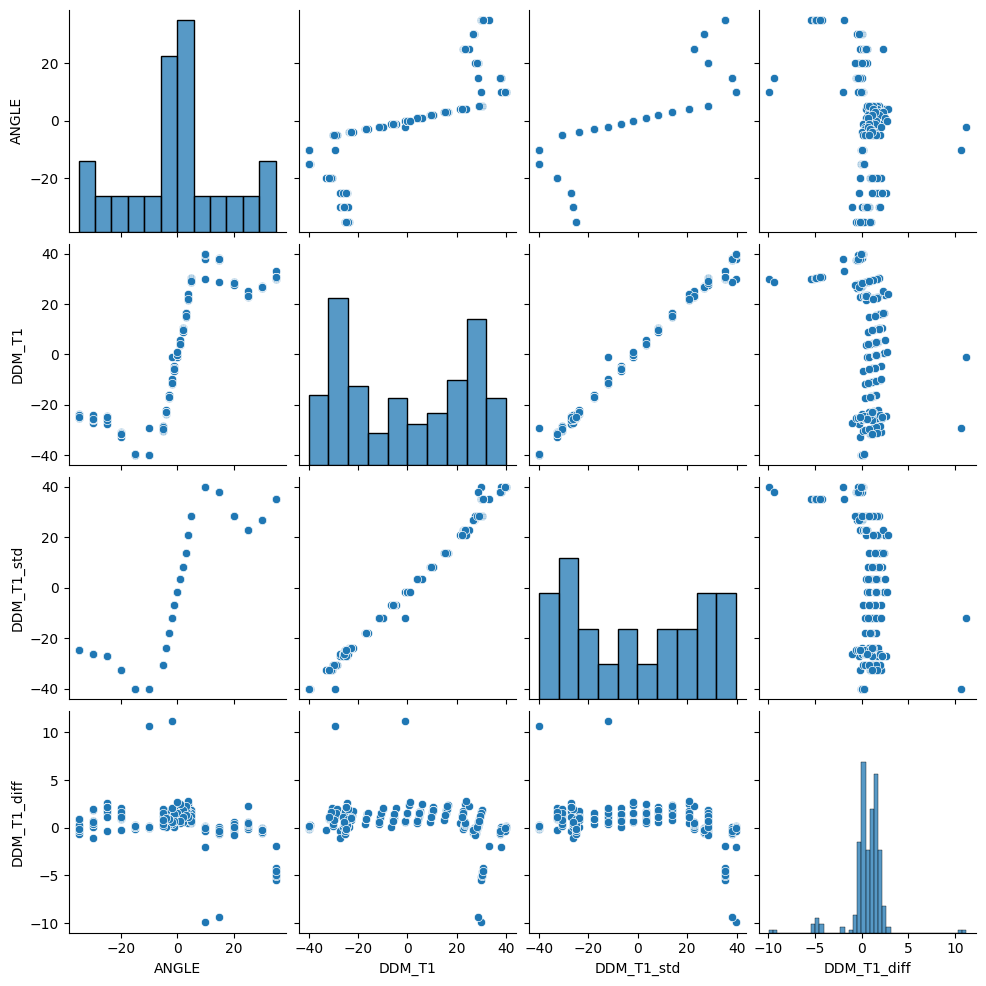

In [15]:
sns.pairplot(df_ddm_t1)

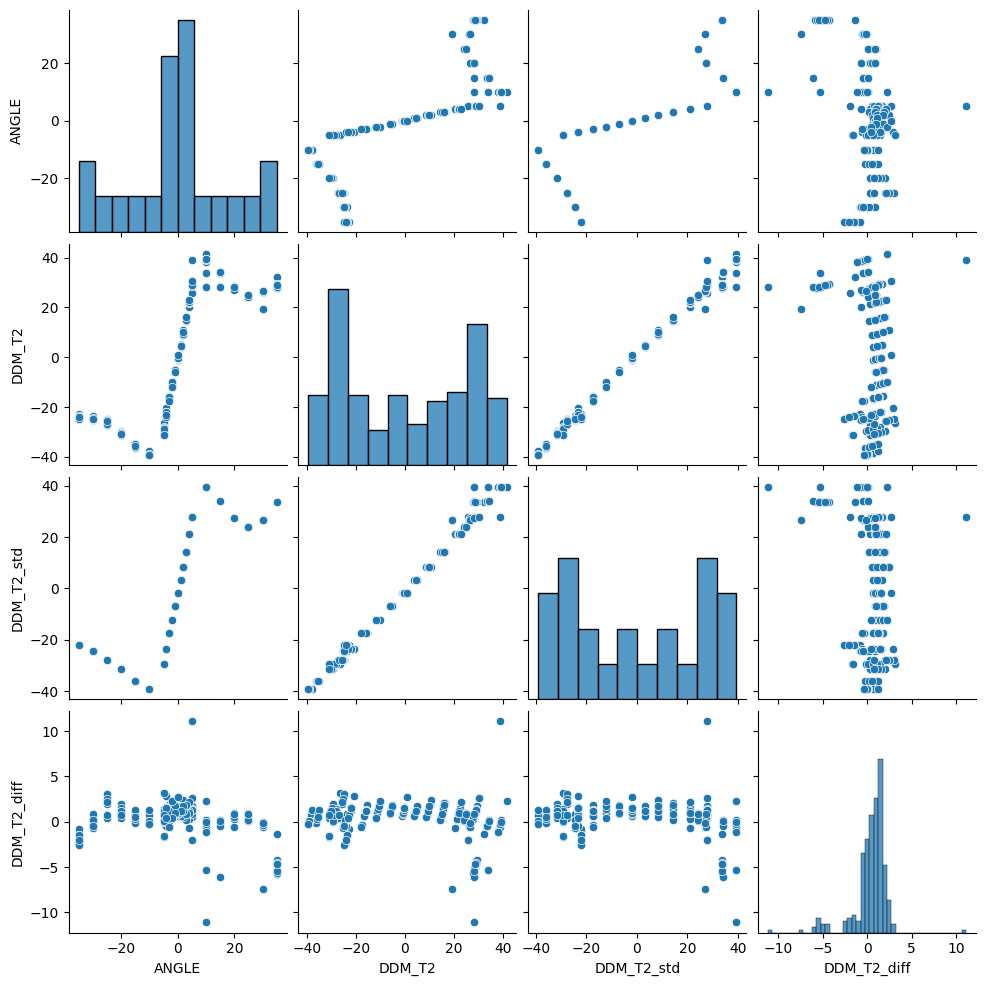

In [16]:
sns.pairplot(df_ddm_t2)

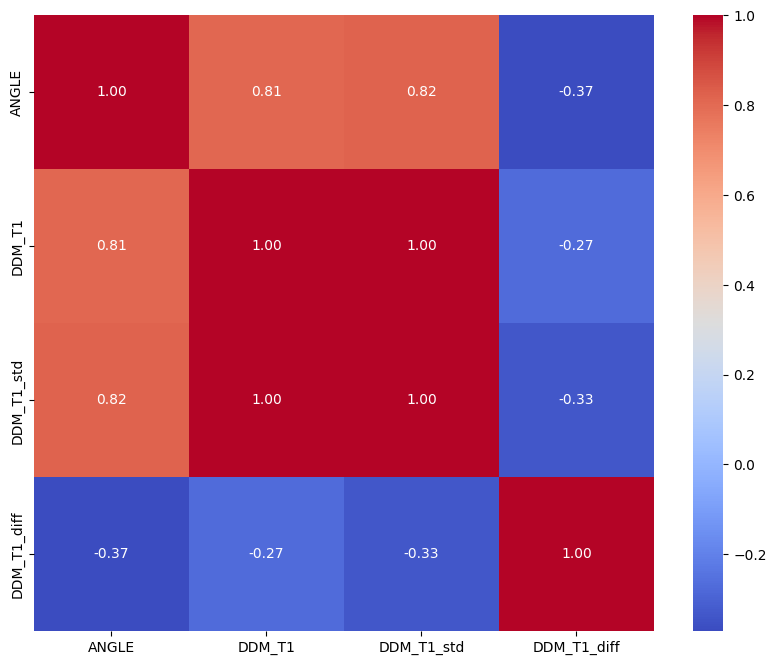

In [17]:
plt.figure(figsize=(10, 8))
sns.heatmap(df_ddm_t1.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.show()

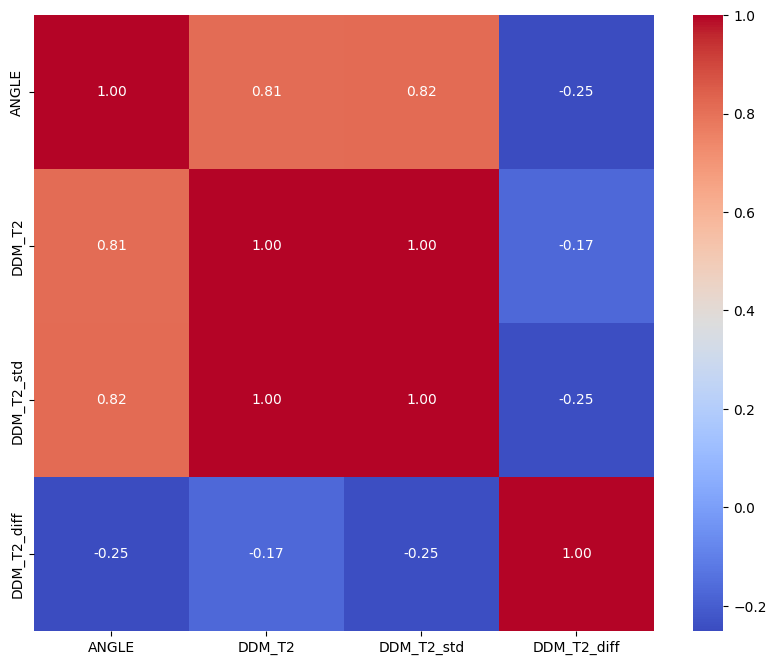

In [18]:
plt.figure(figsize=(10, 8))
sns.heatmap(df_ddm_t2.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.show()

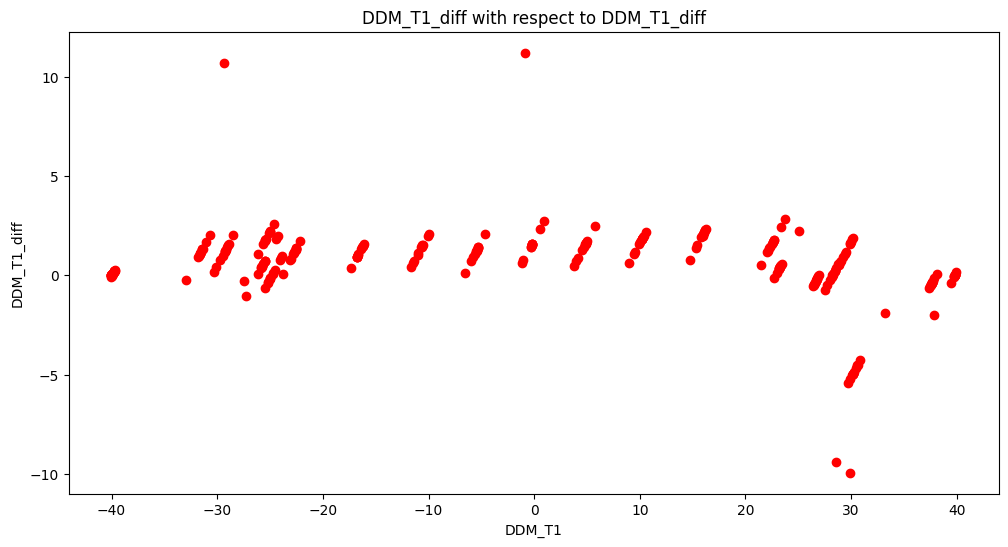

In [19]:
plt.figure(figsize=(12, 6))
plt.scatter(df['DDM_T1'], df['DDM_T1_diff'], color='r')
plt.xlabel('DDM_T1')
plt.ylabel('DDM_T1_diff')
plt.title('DDM_T1_diff with respect to DDM_T1_diff')
plt.show()

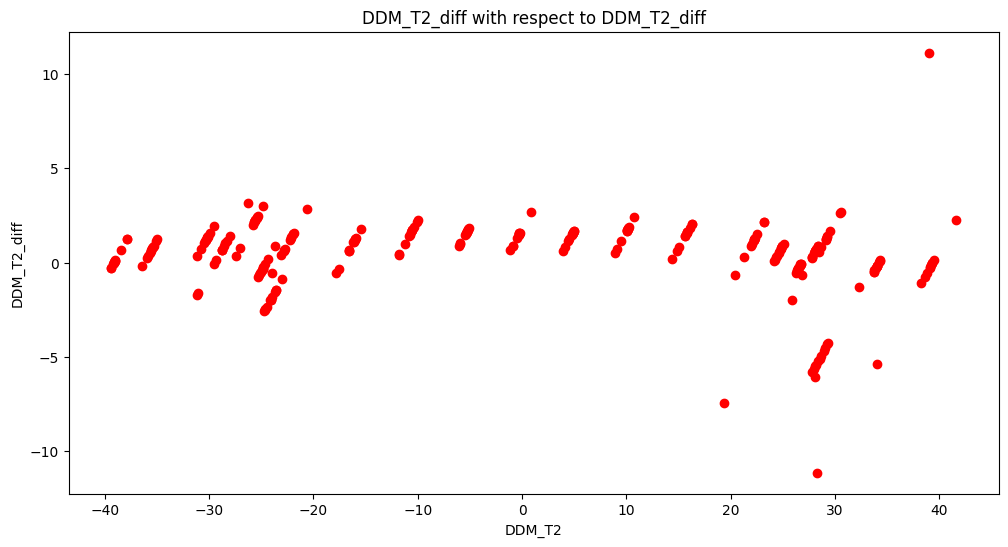

In [20]:
plt.figure(figsize=(12, 6))
plt.scatter(df['DDM_T2'], df['DDM_T2_diff'], color='r')
plt.xlabel('DDM_T2')
plt.ylabel('DDM_T2_diff')
plt.title('DDM_T2_diff with respect to DDM_T2_diff')
plt.show()

In [21]:
df_ddm_t1['ANGLE'] = df['ANGLE'].astype('category').cat.codes

X_ddm_t1 = df_ddm_t1.drop('DDM_T1_diff', axis=1)
y_ddm_t1 = df_ddm_t1['DDM_T1_diff']

/tmp/ipykernel_76217/456496241.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ddm_t1['ANGLE'] = df['ANGLE'].astype('category').cat.codes


In [22]:
df_ddm_t2['ANGLE'] = df['ANGLE'].astype('category').cat.codes

X_ddm_t2 = df_ddm_t2.drop('DDM_T2_diff', axis=1)
y_ddm_t2 = df_ddm_t2['DDM_T2_diff']

/tmp/ipykernel_76217/728638827.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ddm_t2['ANGLE'] = df['ANGLE'].astype('category').cat.codes


In [23]:
X_train_ddm_t1, X_test_ddm_t1, y_train_ddm_t1, y_test_ddm_t1 = train_test_split(X_ddm_t1, y_ddm_t1, test_size=0.2, random_state=42)

In [24]:
X_train_ddm_t2, X_test_ddm_t2, y_train_ddm_t2, y_test_ddm_t2 = train_test_split(X_ddm_t2, y_ddm_t2, test_size=0.2, random_state=42)

In [25]:
model_ddm_t1 = cb.CatBoostRegressor(
    iterations=1000,
    learning_rate=0.1,
    depth=4,
    loss_function='RMSE',
    eval_metric='RMSE',
    random_seed=42
)

# Train the Model for the DDM values for Transmitter 1

In [26]:
model_ddm_t1.fit(X_train_ddm_t1, y_train_ddm_t1, cat_features=[X_train_ddm_t1.columns.get_loc('ANGLE')], eval_set=(X_test_ddm_t1, y_test_ddm_t1), verbose=100)

0:	learn: 1.9150425	test: 1.0363784	best: 1.0363784 (0)	total: 83.1ms	remaining: 1m 23s
100:	learn: 0.7839475	test: 0.5665279	best: 0.5665279 (100)	total: 263ms	remaining: 2.34s
200:	learn: 0.4783948	test: 0.5161422	best: 0.5148810 (196)	total: 414ms	remaining: 1.64s
300:	learn: 0.3674878	test: 0.4731713	best: 0.4731713 (300)	total: 475ms	remaining: 1.1s
400:	learn: 0.3017602	test: 0.4407853	best: 0.4407853 (400)	total: 538ms	remaining: 804ms
500:	learn: 0.2560240	test: 0.4192697	best: 0.4192697 (500)	total: 613ms	remaining: 611ms
600:	learn: 0.2256449	test: 0.3978225	best: 0.3974359 (591)	total: 684ms	remaining: 454ms
700:	learn: 0.1946332	test: 0.3840322	best: 0.3840322 (700)	total: 758ms	remaining: 323ms
800:	learn: 0.1731559	test: 0.3740785	best: 0.3740231 (796)	total: 825ms	remaining: 205ms
900:	learn: 0.1591274	test: 0.3716670	best: 0.3708817 (886)	total: 892ms	remaining: 98ms
999:	learn: 0.1426486	test: 0.3675013	best: 0.3674708 (981)	total: 951ms	remaining: 0us

bestTest = 0.36

In [27]:
model_ddm_t2 = cb.CatBoostRegressor(
    iterations=1000,
    learning_rate=0.2,
    depth=3,
    loss_function='RMSE',
    eval_metric='RMSE',
    random_seed=42
)

In [28]:
model_ddm_t2.fit(X_train_ddm_t2, y_train_ddm_t2, cat_features=[X_train_ddm_t2.columns.get_loc('ANGLE')], eval_set=(X_test_ddm_t2, y_test_ddm_t2), verbose=100)

0:	learn: 1.8010050	test: 1.6697822	best: 1.6697822 (0)	total: 835us	remaining: 834ms
100:	learn: 0.4937615	test: 1.1122428	best: 1.1107150 (96)	total: 45.6ms	remaining: 406ms
200:	learn: 0.3560478	test: 1.0863357	best: 1.0862811 (192)	total: 97.4ms	remaining: 387ms
300:	learn: 0.2802789	test: 1.0716991	best: 1.0712337 (291)	total: 157ms	remaining: 365ms
400:	learn: 0.2341181	test: 1.0665515	best: 1.0658707 (394)	total: 212ms	remaining: 317ms
500:	learn: 0.1972921	test: 1.0444563	best: 1.0444563 (500)	total: 264ms	remaining: 263ms
600:	learn: 0.1695555	test: 1.0379591	best: 1.0378447 (565)	total: 309ms	remaining: 205ms
700:	learn: 0.1497958	test: 1.0335083	best: 1.0326134 (678)	total: 367ms	remaining: 157ms
800:	learn: 0.1320925	test: 1.0290654	best: 1.0280252 (776)	total: 423ms	remaining: 105ms
900:	learn: 0.1182616	test: 1.0298562	best: 1.0280252 (776)	total: 480ms	remaining: 52.8ms
999:	learn: 0.1067300	test: 1.0268639	best: 1.0262838 (970)	total: 525ms	remaining: 0us

bestTest = 1.

In [29]:
predictions_ddm_t1 = model_ddm_t1.predict(X_test_ddm_t1)

predictions_ddm_t2 = model_ddm_t2.predict(X_test_ddm_t2)

In [30]:
predictions_ddm_t1, predictions_ddm_t2

(array([ 1.56574071e+00,  1.42478823e+00,  1.45388056e+00,  1.45388056e+00,
         1.42478823e+00, -4.04345905e-01,  1.53460618e+00,  1.32543406e+00,
        -2.30326468e-01, -2.07269925e-01,  1.19095454e+00, -5.80510063e-03,
         1.98804131e+00,  8.45412191e-01,  1.25152579e+00, -4.65301780e-01,
         1.17471465e+00,  1.25152579e+00,  1.11670119e+00,  1.42478823e+00,
        -2.11803180e-03, -4.92342004e-01,  1.12876917e+00,  1.27363756e-01,
         1.75805040e+00,  5.94385223e-02,  2.48984472e-01,  1.12876917e+00,
         1.14710416e+00,  2.21246788e-01, -2.05176334e-01, -5.80510063e-03,
        -1.82997002e-01, -1.48758937e-01,  1.25152579e+00,  5.54595259e-01,
        -2.30326468e-01, -2.38871983e-01,  5.54595259e-01,  7.66316432e-01,
        -4.22916161e+00,  1.55732734e+00,  2.27933624e+00,  2.48984472e-01,
        -3.48882671e-01,  7.66316432e-01,  1.09016775e+00, -5.38952302e-02,
         1.50908280e+00,  2.21109803e+00, -5.38952302e-02,  6.93678038e-01,
         8.3

In [31]:
results_ddm_t1 = pd.DataFrame([predictions_ddm_t1, y_test_ddm_t1]).transpose().rename(columns={0: 'Predictions_ddm_t1', 1: 'y_test_ddm_t1'})
results_ddm_t1.head(10)

,Predictions_ddm_t1,y_test_ddm_t1
0,1.565741,1.75
1,1.424788,1.82
2,1.453881,2.06
3,1.453881,1.40
4,1.424788,1.80
5,-0.404346,-0.16
6,1.534606,1.82
7,1.325434,1.31
8,-0.230326,-0.27
9,-0.207270,0.01


In [32]:
results_ddm_t2 = pd.DataFrame([predictions_ddm_t2, y_test_ddm_t2]).transpose().rename(columns={0: 'Predictions_ddm_t2', 1: 'y_test_ddm_t2'})
results_ddm_t2.head(10)

,Predictions_ddm_t2,y_test_ddm_t2
0,1.247393,1.17
1,1.638999,1.78
2,1.527569,1.83
3,1.559159,1.62
4,1.450256,1.67
5,0.220754,0.14
6,1.535059,1.67
7,1.431674,1.55
8,-0.260050,-0.18
9,-1.096753,-1.11


([<matplotlib.axis.XTick at 0x7fdace4eab30>,
 [Text(0, 0, '0'),
  Text(5, 0, '5'),
  Text(10, 0, '10'),
  Text(15, 0, '15'),
  Text(20, 0, '20'),
  Text(25, 0, '25'),
  Text(30, 0, '30'),
  Text(35, 0, '35'),
  Text(40, 0, '40'),
  Text(45, 0, '45'),
  Text(50, 0, '50'),
  Text(55, 0, '55')])

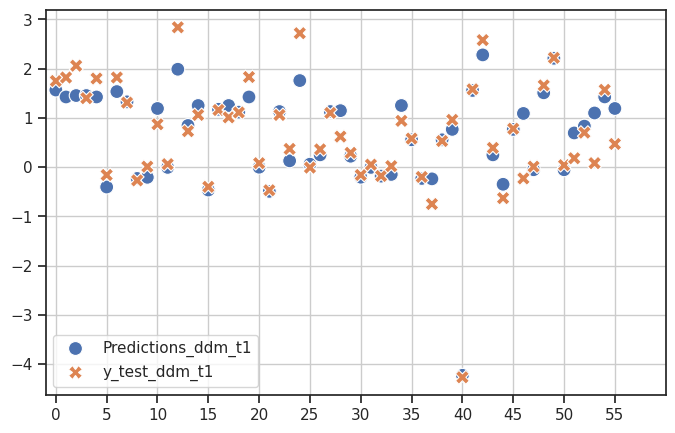

In [33]:
plt.figure(figsize=(8,5))
sns.set(style = 'ticks')

sns.scatterplot(results_ddm_t1, s=100)
x_ticks = np.arange(0, 60, 5)
plt.xlim(-1, 60)
plt.grid(True)
plt.xticks(x_ticks)

([<matplotlib.axis.XTick at 0x7fdaa5f0c580>,
 [Text(0, 0, '0'),
  Text(5, 0, '5'),
  Text(10, 0, '10'),
  Text(15, 0, '15'),
  Text(20, 0, '20'),
  Text(25, 0, '25'),
  Text(30, 0, '30'),
  Text(35, 0, '35'),
  Text(40, 0, '40'),
  Text(45, 0, '45'),
  Text(50, 0, '50'),
  Text(55, 0, '55')])

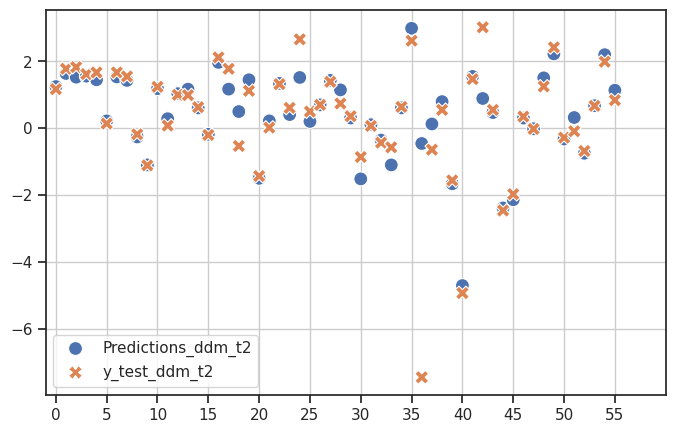

In [34]:
plt.figure(figsize=(8,5))
sns.set(style = 'ticks')

sns.scatterplot(results_ddm_t2, s=100)
x_ticks = np.arange(0, 60, 5)
plt.xlim(-1, 60)
plt.grid(True)
plt.xticks(x_ticks)

In [35]:
best_score_ddm_t1 = model_ddm_t1.get_best_score()
best_score_ddm_t2 = model_ddm_t2.get_best_score()


print(f"Best Score for DDM_T1: {best_score_ddm_t1}, \nBest Score for DDM_T2: {best_score_ddm_t2}")

Best Score for DDM_T1: {'learn': {'RMSE': 0.14264864690404933}, 'validation': {'RMSE': 0.3674708281452521}}, 
Best Score for DDM_T2: {'learn': {'RMSE': 0.10672995186038027}, 'validation': {'RMSE': 1.026283816104635}}


In [36]:
X_test_ddm_t1.head(10)

,ANGLE,DDM_T1,DDM_T1_std
30,15,22.67,20.92
124,13,10.22,8.40
196,10,-4.61,-6.67
127,10,-5.27,-6.67
216,13,10.20,8.40
234,18,37.87,38.03
144,16,30.13,28.31
203,3,-31.41,-32.72
254,21,26.66,26.93
143,17,39.82,39.81


In [37]:
X_test_ddm_t2.head()

,ANGLE,DDM_T2,DDM_T2_std
30,15,22.20,21.03
124,13,10.16,8.38
196,10,-5.10,-6.93
127,10,-5.31,-6.93
216,13,10.05,8.38


In [38]:
X_test_ddm_t1['DDM_T1_predicted'] = X_test_ddm_t1['DDM_T1'] + predictions_ddm_t1

X_test_ddm_t2['DDM_T2_predicted'] = X_test_ddm_t2['DDM_T2'] + predictions_ddm_t2

/tmp/ipykernel_76217/3912589430.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test_ddm_t1['DDM_T1_predicted'] = X_test_ddm_t1['DDM_T1'] + predictions_ddm_t1
/tmp/ipykernel_76217/3912589430.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test_ddm_t2['DDM_T2_predicted'] = X_test_ddm_t2['DDM_T2'] + predictions_ddm_t2


In [39]:
X_test_ddm_t1.head(10)

,ANGLE,DDM_T1,DDM_T1_std,DDM_T1_predicted
30,15,22.67,20.92,24.235741
124,13,10.22,8.40,11.644788
196,10,-4.61,-6.67,-3.156119
127,10,-5.27,-6.67,-3.816119
216,13,10.20,8.40,11.624788
234,18,37.87,38.03,37.465654
144,16,30.13,28.31,31.664606
203,3,-31.41,-32.72,-30.084566
254,21,26.66,26.93,26.429674
143,17,39.82,39.81,39.612730


In [40]:
X_test_ddm_t2.head()

,ANGLE,DDM_T2,DDM_T2_std,DDM_T2_predicted
30,15,22.20,21.03,23.447393
124,13,10.16,8.38,11.798999
196,10,-5.10,-6.93,-3.572431
127,10,-5.31,-6.93,-3.750841
216,13,10.05,8.38,11.500256


In [41]:
X_test_ddm_t1 = X_test_ddm_t1.merge(df[['ANGLE']], left_on='ANGLE', right_index=True, how='left')

X_test_ddm_t2 = X_test_ddm_t2.merge(df[['ANGLE']], left_on='ANGLE', right_index=True, how='left')

In [42]:
X_test_ddm_t1.head(20)

,ANGLE_x,DDM_T1,DDM_T1_std,DDM_T1_predicted,ANGLE_y
30,15,22.67,20.92,24.235741,-4.0
124,13,10.22,8.40,11.644788,-2.0
196,10,-4.61,-6.67,-3.156119,1.0
127,10,-5.27,-6.67,-3.816119,1.0
216,13,10.20,8.40,11.624788,-2.0
234,18,37.87,38.03,37.465654,-15.0
144,16,30.13,28.31,31.664606,-5.0
203,3,-31.41,-32.72,-30.084566,20.0
254,21,26.66,26.93,26.429674,-30.0
143,17,39.82,39.81,39.612730,-10.0


In [43]:
X_test_ddm_t2.head(20)

,ANGLE_x,DDM_T2,DDM_T2_std,DDM_T2_predicted,ANGLE_y
30,15,22.20,21.03,23.447393,-4.0
124,13,10.16,8.38,11.798999,-2.0
196,10,-5.10,-6.93,-3.572431,1.0
127,10,-5.31,-6.93,-3.750841,1.0
216,13,10.05,8.38,11.500256,-2.0
234,18,34.34,34.20,34.560754,-15.0
144,16,29.57,27.90,31.105059,-5.0
203,3,-29.95,-31.50,-28.518326,20.0
254,21,26.61,26.79,26.349950,-30.0
143,17,38.27,39.38,37.173247,-10.0


In [44]:
angle_order = [35, 30, 25, 20, 15, 10, 5, 4, 3, 2, 1, 0, -1, -2, -3, -4, -5, -10, -15, -20, -25, -30, -35]

X_test_ddm_t1['ANGLE_y_ordered'] = pd.Categorical(X_test_ddm_t1['ANGLE_y'], categories=angle_order, ordered=True)
X_test_sorted_ddm_t1 = X_test_ddm_t1.sort_values(by='ANGLE_y_ordered')



X_test_ddm_t2['ANGLE_y_ordered'] = pd.Categorical(X_test_ddm_t2['ANGLE_y'], categories=angle_order, ordered=True)
X_test_sorted_ddm_t2 = X_test_ddm_t2.sort_values(by='ANGLE_y_ordered')

In [45]:
X_test_sorted_ddm_t1.head(20)

,ANGLE_x,DDM_T1,DDM_T1_std,DDM_T1_predicted,ANGLE_y,ANGLE_y_ordered
68,0,-23.86,-24.82,-23.093684,35.0,35
45,0,-24.74,-24.82,-24.742118,35.0,35
114,0,-25.45,-24.82,-25.798883,35.0,35
22,0,-24.98,-24.82,-25.185176,35.0,35
206,0,-24.04,-24.82,-23.273684,35.0,35
159,1,-25.51,-26.21,-24.677495,30.0,30
158,2,-25.63,-27.20,-24.204178,25.0,25
66,2,-24.62,-27.20,-22.340664,25.0,25
204,2,-24.98,-27.20,-22.768902,25.0,25
180,3,-31.66,-32.72,-30.531231,20.0,20


In [46]:
X_test_sorted_ddm_t2.head(20)

,ANGLE_x,DDM_T2,DDM_T2_std,DDM_T2_predicted,ANGLE_y,ANGLE_y_ordered
68,0,-23.70,-22.14,-25.361114,35.0,35
45,0,-23.57,-22.14,-25.068136,35.0,35
114,0,-24.60,-22.14,-26.984414,35.0,35
22,0,-23.00,-22.14,-24.514354,35.0,35
206,0,-24.11,-22.14,-26.247670,35.0,35
159,1,-25.22,-24.54,-25.968144,30.0,30
158,2,-25.82,-27.81,-23.618853,25.0,25
66,2,-24.79,-27.81,-23.899230,25.0,25
204,2,-25.39,-27.81,-23.165359,25.0,25
180,3,-30.18,-31.50,-28.837431,20.0,20


# For Transmitter 1

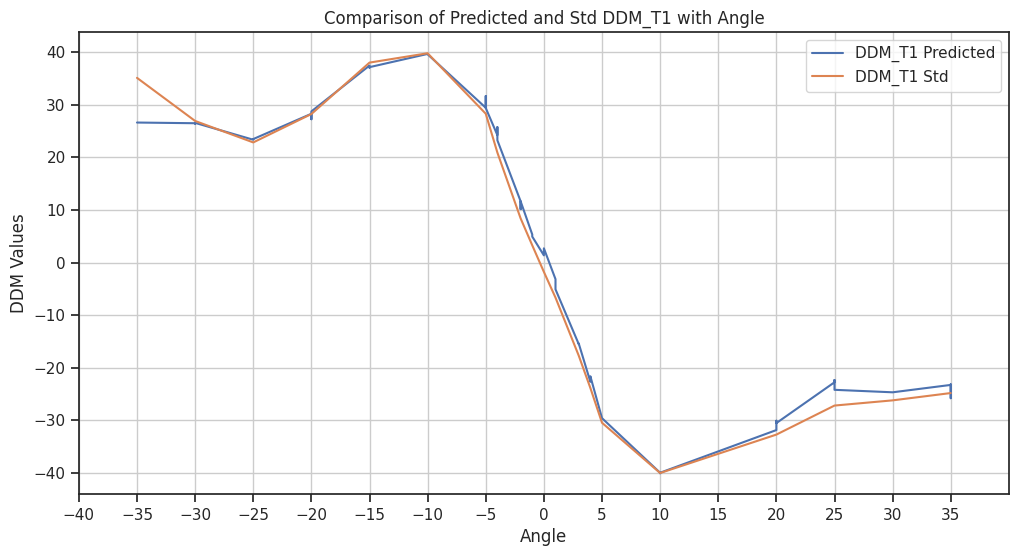

In [47]:
plt.figure(figsize=(12, 6))
plt.plot(X_test_sorted_ddm_t1['ANGLE_y_ordered'], X_test_sorted_ddm_t1['DDM_T1_predicted'], label='DDM_T1 Predicted')
plt.plot(X_test_sorted_ddm_t1['ANGLE_y_ordered'], X_test_sorted_ddm_t1['DDM_T1_std'], label='DDM_T1 Std')

x_ticks = np.arange(-40, 40, 5)
plt.xlim(-40,40)
plt.grid(True)
plt.xticks(x_ticks)

plt.xlabel('Angle')
plt.ylabel('DDM Values')
plt.title('Comparison of Predicted and Std DDM_T1 with Angle')
plt.legend()
plt.show()

# For Transmitter 2

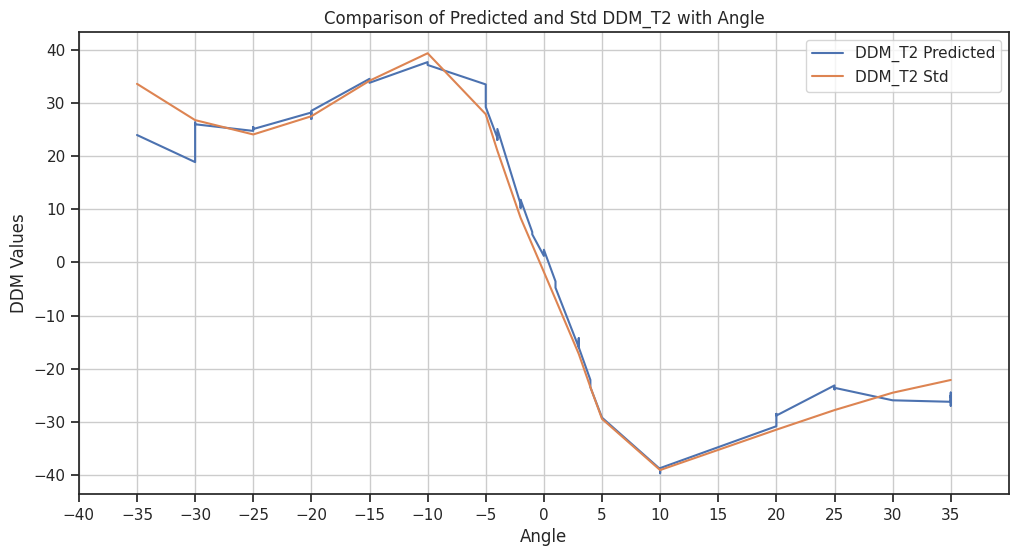

In [48]:
plt.figure(figsize=(12, 6))
plt.plot(X_test_sorted_ddm_t2['ANGLE_y_ordered'], X_test_sorted_ddm_t2['DDM_T2_predicted'], label='DDM_T2 Predicted')
plt.plot(X_test_sorted_ddm_t2['ANGLE_y_ordered'], X_test_sorted_ddm_t2['DDM_T2_std'], label='DDM_T2 Std')

x_ticks = np.arange(-40, 40, 5)
plt.xlim(-40,40)
plt.grid(True)
plt.xticks(x_ticks)

plt.xlabel('Angle')
plt.ylabel('DDM Values')
plt.title('Comparison of Predicted and Std DDM_T2 with Angle')
plt.legend()
plt.show()

# For both Transmitter 1 and 2

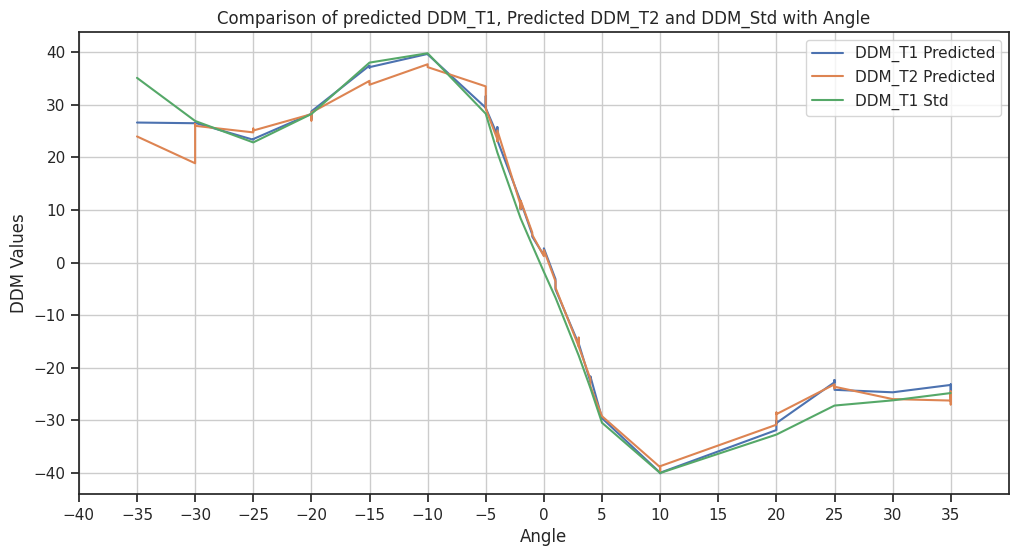

In [49]:
plt.figure(figsize=(12, 6))
plt.plot(X_test_sorted_ddm_t1['ANGLE_y_ordered'], X_test_sorted_ddm_t1['DDM_T1_predicted'], label='DDM_T1 Predicted')
plt.plot(X_test_sorted_ddm_t2['ANGLE_y_ordered'], X_test_sorted_ddm_t2['DDM_T2_predicted'], label='DDM_T2 Predicted')
plt.plot(X_test_sorted_ddm_t1['ANGLE_y_ordered'], X_test_sorted_ddm_t1['DDM_T1_std'], label='DDM_T1 Std')


# Customizing the x-axis
x_ticks = np.arange(-40, 40, 5)
plt.xlim(-40, 40)
plt.xticks(x_ticks)

# Adding grid lines for better readability
plt.grid(True)

plt.xlabel('Angle')
plt.ylabel('DDM Values')
plt.title('Comparison of predicted DDM_T1, Predicted DDM_T2 and DDM_Std with Angle')
plt.legend()
plt.show()

# Work on the SDM values for the two transmitters

In [50]:
corr_matrix_sdm_t1 = df_sdm_t1[['ANGLE', 'SDM_T1', 'SDM_T1_std','SDM_T1_diff']].corr()
corr_matrix_sdm_t1

,ANGLE,SDM_T1,SDM_T1_std,SDM_T1_diff
ANGLE,1.000000,-0.066494,-0.065628,0.014613
SDM_T1,-0.066494,1.000000,0.870009,0.017431
SDM_T1_std,-0.065628,0.870009,1.000000,-0.477796
SDM_T1_diff,0.014613,0.017431,-0.477796,1.000000


In [51]:
corr_matrix_sdm_t2 = df_sdm_t2[['ANGLE', 'SDM_T2', 'SDM_T2_std','SDM_T2_diff']].corr()
corr_matrix_sdm_t2

,ANGLE,SDM_T2,SDM_T2_std,SDM_T2_diff
ANGLE,1.000000,-0.177704,-0.092391,-0.075604
SDM_T2,-0.177704,1.000000,0.076843,0.729435
SDM_T2_std,-0.092391,0.076843,1.000000,-0.625975
SDM_T2_diff,-0.075604,0.729435,-0.625975,1.000000


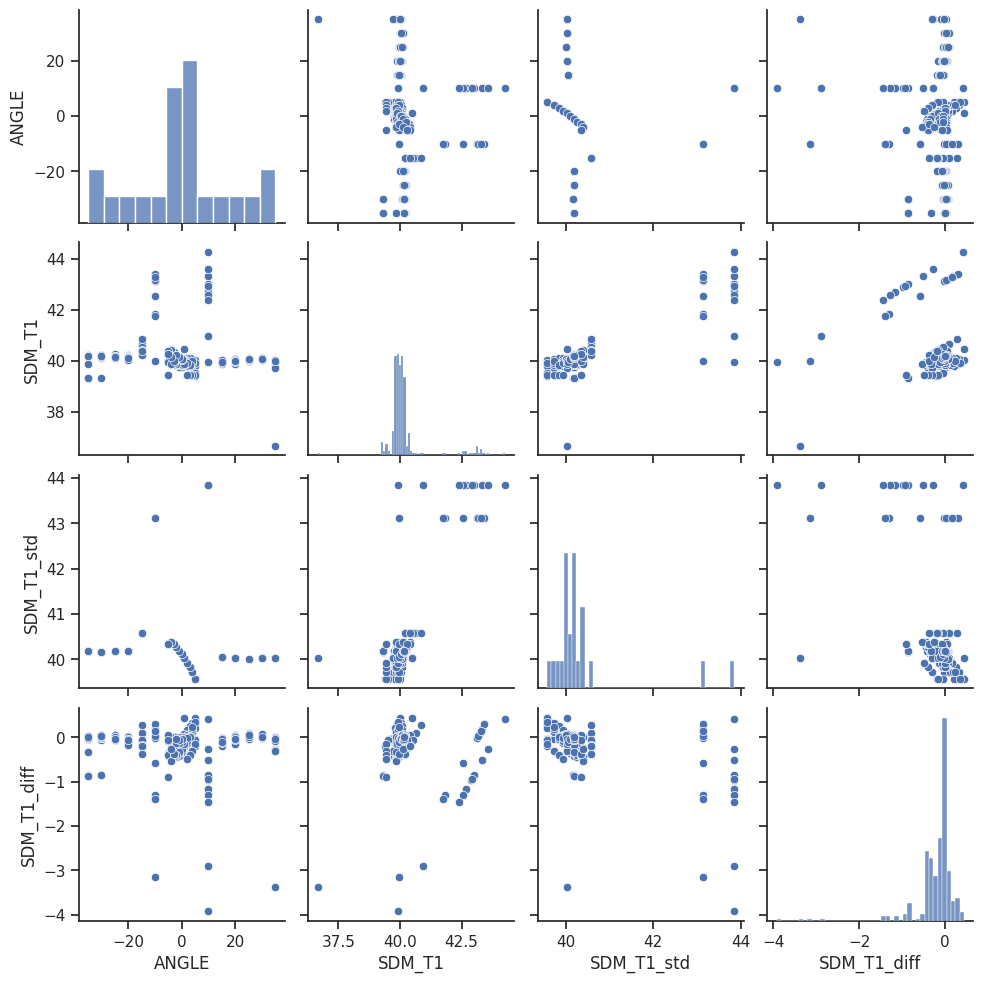

In [52]:
sns.pairplot(df_sdm_t1)

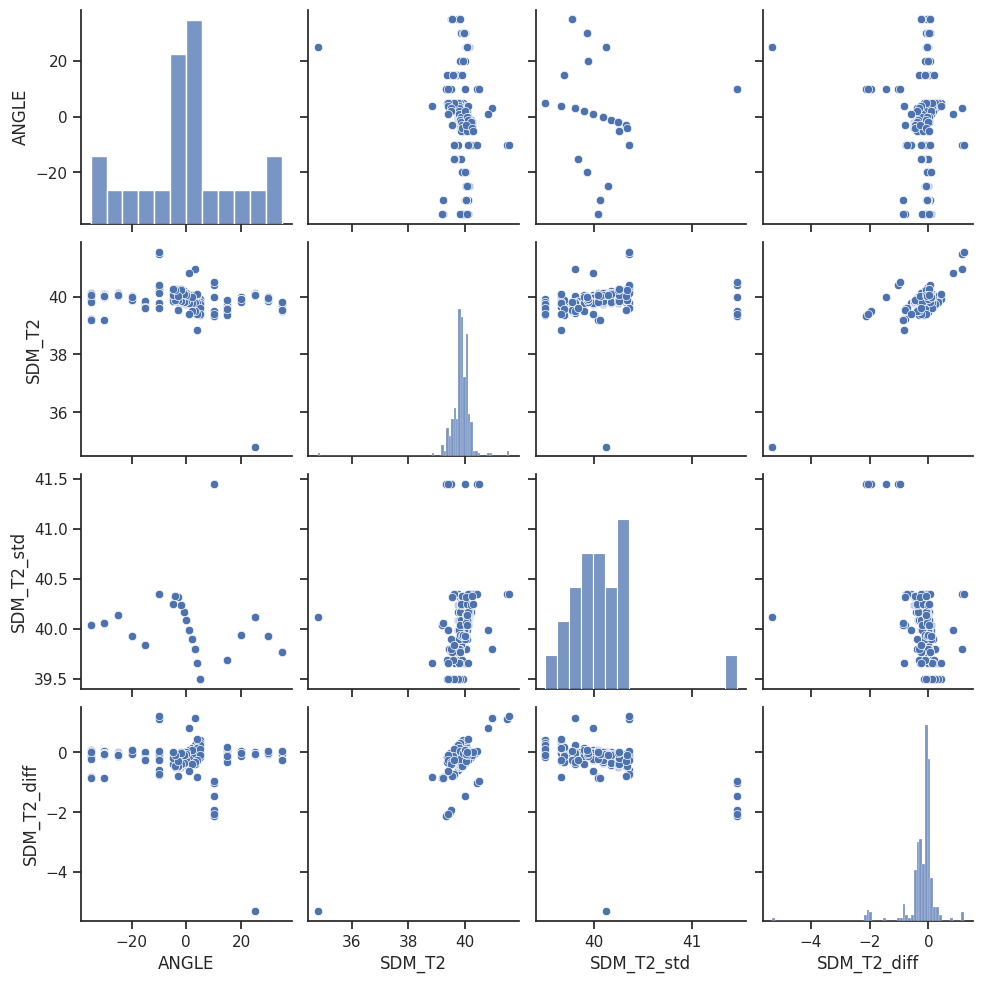

In [53]:
sns.pairplot(df_sdm_t2)

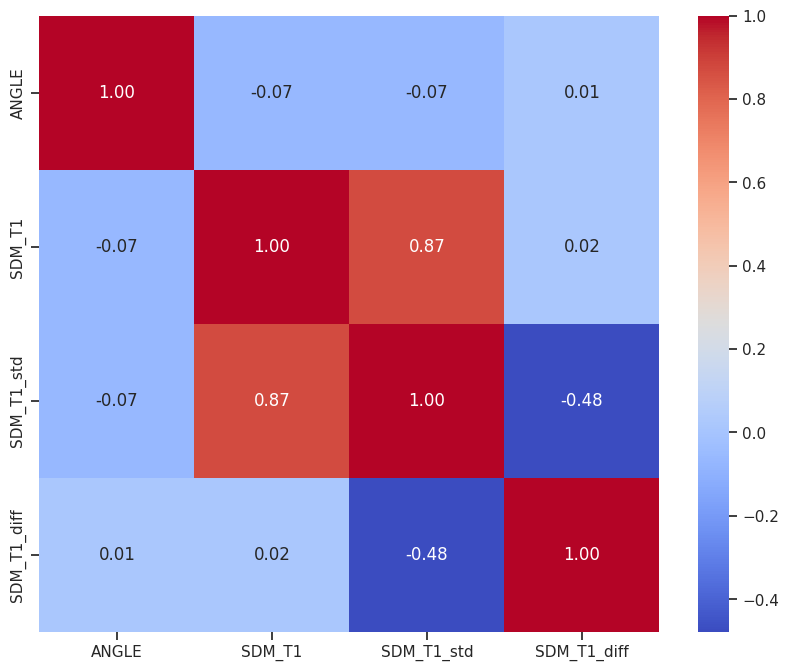

In [54]:
plt.figure(figsize=(10, 8))
sns.heatmap(df_sdm_t1.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.show()

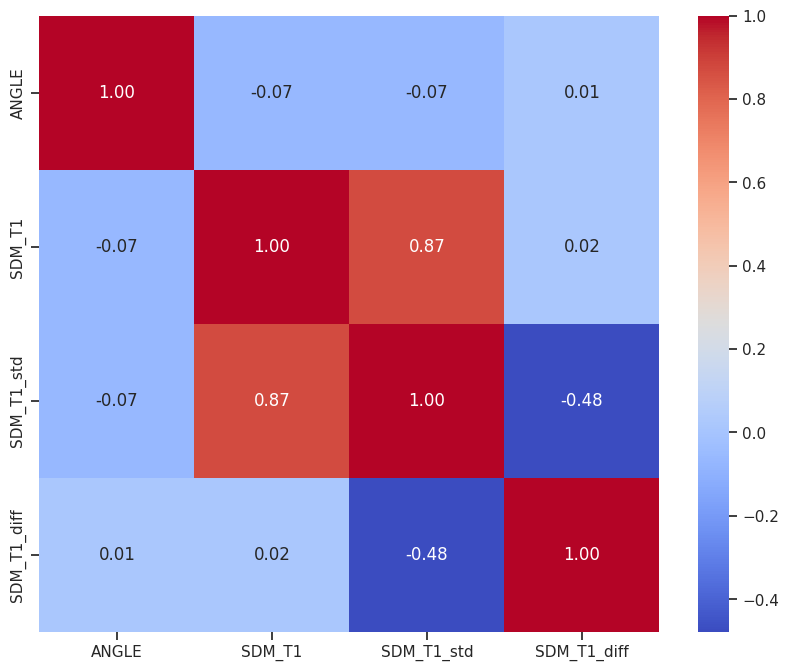

In [55]:
plt.figure(figsize=(10, 8))
sns.heatmap(df_sdm_t1.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.show()

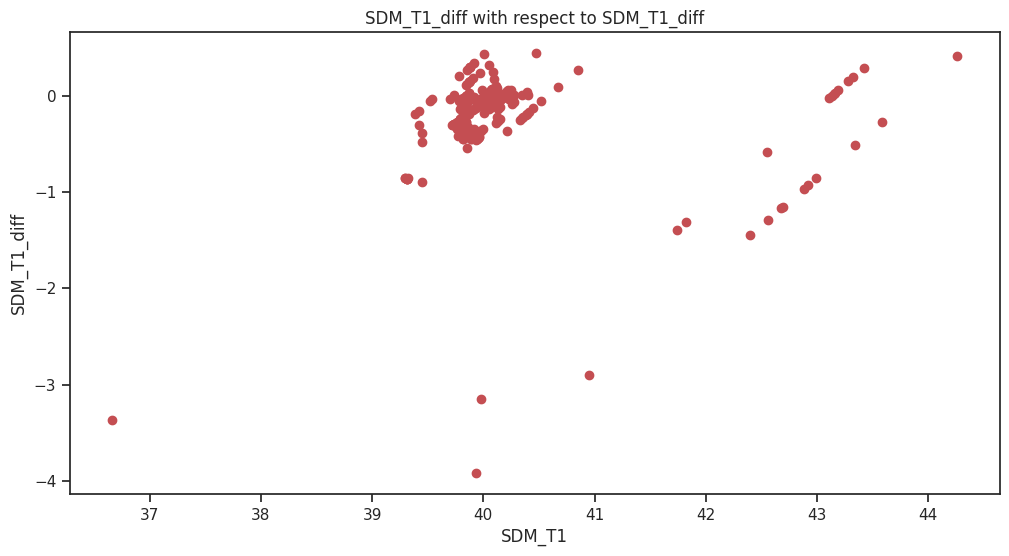

In [56]:
plt.figure(figsize=(12, 6))
plt.scatter(df['SDM_T1'], df['SDM_T1_diff'], color='r')
plt.xlabel('SDM_T1')
plt.ylabel('SDM_T1_diff')
plt.title('SDM_T1_diff with respect to SDM_T1_diff')
plt.show()

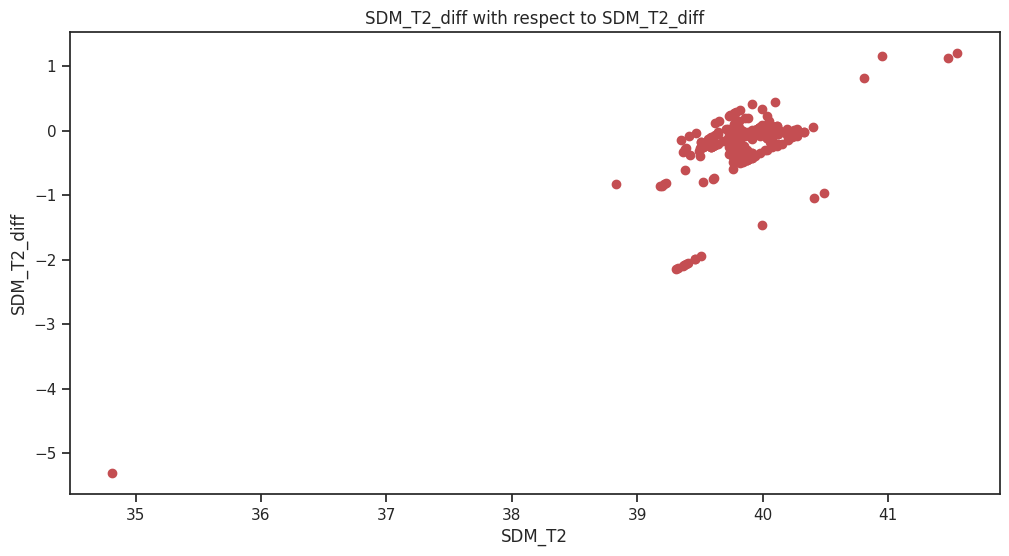

In [57]:
plt.figure(figsize=(12, 6))
plt.scatter(df['SDM_T2'], df['SDM_T2_diff'], color='r')
plt.xlabel('SDM_T2')
plt.ylabel('SDM_T2_diff')
plt.title('SDM_T2_diff with respect to SDM_T2_diff')
plt.show()

In [58]:
df_sdm_t1['ANGLE'] = df['ANGLE'].astype('category').cat.codes

X_sdm_t1 = df_sdm_t1.drop('SDM_T1_diff', axis=1)
y_sdm_t1 = df_sdm_t1['SDM_T1_diff']

/tmp/ipykernel_76217/727076988.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sdm_t1['ANGLE'] = df['ANGLE'].astype('category').cat.codes


In [59]:
df_sdm_t2['ANGLE'] = df['ANGLE'].astype('category').cat.codes

X_sdm_t2 = df_sdm_t2.drop('SDM_T2_diff', axis=1)
y_sdm_t2 = df_sdm_t2['SDM_T2_diff']

/tmp/ipykernel_76217/3265723829.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sdm_t2['ANGLE'] = df['ANGLE'].astype('category').cat.codes


In [60]:
X_train_sdm_t1, X_test_sdm_t1, y_train_sdm_t1, y_test_sdm_t1 = train_test_split(X_sdm_t1, y_sdm_t1, test_size=0.2, random_state=42)

In [61]:
X_train_sdm_t2, X_test_sdm_t2, y_train_sdm_t2, y_test_sdm_t2 = train_test_split(X_sdm_t2, y_sdm_t2, test_size=0.2, random_state=42)

# Model Development for the SDM data

In [62]:
model_sdm_t1 = cb.CatBoostRegressor(
    iterations=1000,
    learning_rate=0.1,
    depth=3,
    loss_function='RMSE',
    eval_metric='RMSE',
    random_seed=42
)

model_sdm_t2 = cb.CatBoostRegressor(
    iterations=1000,
    learning_rate=0.1,
    depth=3,
    loss_function='RMSE',
    eval_metric='RMSE',
    random_seed=42
)

In [63]:
model_sdm_t1.fit(X_train_sdm_t1, y_train_sdm_t1, cat_features=[X_train_sdm_t1.columns.get_loc('ANGLE')], eval_set=(X_test_sdm_t1, y_test_sdm_t1), verbose=100)

0:	learn: 0.5026303	test: 0.3341633	best: 0.3341633 (0)	total: 1.42ms	remaining: 1.41s
100:	learn: 0.1217302	test: 0.0948263	best: 0.0948263 (100)	total: 83.8ms	remaining: 746ms
200:	learn: 0.0533401	test: 0.0534470	best: 0.0534470 (200)	total: 165ms	remaining: 654ms
300:	learn: 0.0358574	test: 0.0422904	best: 0.0422325 (299)	total: 245ms	remaining: 570ms
400:	learn: 0.0281114	test: 0.0388932	best: 0.0388809 (399)	total: 316ms	remaining: 471ms
500:	learn: 0.0226015	test: 0.0365876	best: 0.0365876 (500)	total: 374ms	remaining: 372ms
600:	learn: 0.0188321	test: 0.0353866	best: 0.0353866 (600)	total: 444ms	remaining: 294ms
700:	learn: 0.0162372	test: 0.0344377	best: 0.0344127 (696)	total: 532ms	remaining: 227ms
800:	learn: 0.0144311	test: 0.0336964	best: 0.0336630 (798)	total: 669ms	remaining: 166ms
900:	learn: 0.0127897	test: 0.0327544	best: 0.0327046 (892)	total: 772ms	remaining: 84.8ms
999:	learn: 0.0114357	test: 0.0324754	best: 0.0324754 (999)	total: 835ms	remaining: 0us

bestTest = 0

In [64]:
model_sdm_t2.fit(X_train_sdm_t2, y_train_sdm_t2, cat_features=[X_train_sdm_t2.columns.get_loc('ANGLE')], eval_set=(X_test_sdm_t2, y_test_sdm_t2), verbose=100)

0:	learn: 0.5319717	test: 0.4539985	best: 0.4539985 (0)	total: 580us	remaining: 580ms
100:	learn: 0.0707722	test: 0.0692997	best: 0.0692997 (100)	total: 69.2ms	remaining: 616ms
200:	learn: 0.0206771	test: 0.0317473	best: 0.0317473 (200)	total: 143ms	remaining: 569ms
300:	learn: 0.0136678	test: 0.0272433	best: 0.0272433 (300)	total: 216ms	remaining: 501ms
400:	learn: 0.0107227	test: 0.0252055	best: 0.0252055 (400)	total: 286ms	remaining: 428ms
500:	learn: 0.0090361	test: 0.0241974	best: 0.0241611 (492)	total: 340ms	remaining: 338ms
600:	learn: 0.0077076	test: 0.0232164	best: 0.0231986 (596)	total: 479ms	remaining: 318ms
700:	learn: 0.0067418	test: 0.0225362	best: 0.0224990 (673)	total: 562ms	remaining: 240ms
800:	learn: 0.0058511	test: 0.0218516	best: 0.0218481 (799)	total: 633ms	remaining: 157ms
900:	learn: 0.0051786	test: 0.0216520	best: 0.0216031 (899)	total: 698ms	remaining: 76.7ms
999:	learn: 0.0046442	test: 0.0212963	best: 0.0212908 (989)	total: 771ms	remaining: 0us

bestTest = 0.

In [65]:
predictions_sdm_t1 = model_sdm_t1.predict(X_test_sdm_t1)

predictions_sdm_t2 = model_sdm_t2.predict(X_test_sdm_t2)

In [66]:
predictions_sdm_t1, predictions_sdm_t2

(array([ 1.60380687e-01, -8.36897946e-02, -3.48387569e-01, -3.70227436e-01,
        -7.91359218e-02, -7.02198500e-02,  2.42897548e-01, -4.88152732e-02,
         6.47309545e-03, -1.34162927e+00, -8.23818102e-02,  2.92170998e-02,
         2.69238618e-01, -6.19145364e-02, -4.44428407e-01, -1.92567117e-01,
        -2.75377910e-01, -2.07441302e-02, -2.33880040e-01, -7.05808671e-03,
        -8.87918921e-01, -1.32797537e-01, -4.88152732e-02, -1.19276699e-01,
        -3.19560741e-02, -5.25718818e-02,  1.12686709e-03, -2.42097306e-02,
         1.45591047e-01, -1.59257638e-02,  3.49254814e-02,  1.01074362e-01,
         5.20716287e-02, -1.14289250e+00, -4.47775348e-01, -2.05707111e-01,
         5.52196577e-02, -4.45884350e-02,  3.80854487e-01,  1.64034753e-02,
        -1.03474969e-01, -3.13740364e-01,  9.49785309e-03,  2.55696655e-02,
        -3.24374267e-02, -8.87918921e-01,  1.79391734e-02,  2.20508266e-03,
         1.60380687e-01, -1.48099615e-02,  2.92170998e-02, -3.98922058e-01,
        -8.5

In [67]:
results_sdm_t1 = pd.DataFrame([predictions_sdm_t1, y_test_sdm_t1]).transpose().rename(columns={0: 'Predictions_sdm_t1', 1: 'y_test_sdm_t1'})
results_sdm_t1.head(10)

,Predictions_sdm_t1,y_test_sdm_t1
0,0.160381,0.14
1,-0.083690,-0.09
2,-0.348388,-0.35
3,-0.370227,-0.38
4,-0.079136,-0.08
5,-0.070220,-0.05
6,0.242898,0.27
7,-0.048815,-0.04
8,0.006473,0.01
9,-1.341629,-1.29


In [68]:
results_sdm_t2 = pd.DataFrame([predictions_sdm_t2, y_test_sdm_t2]).transpose().rename(columns={0: 'Predictions_sdm_t2', 1: 'y_test_sdm_t2'})
results_sdm_t2.head(10)

,Predictions_sdm_t2,y_test_sdm_t2
0,0.210564,0.20
1,-0.132925,-0.13
2,-0.309522,-0.31
3,-0.361887,-0.37
4,-0.123127,-0.12
5,-0.390059,-0.33
6,0.265218,0.27
7,0.068548,0.07
8,0.023595,0.03
9,-2.112287,-2.14


([<matplotlib.axis.XTick at 0x7fdaa4a6fa60>,
 [Text(0, 0, '0'),
  Text(5, 0, '5'),
  Text(10, 0, '10'),
  Text(15, 0, '15'),
  Text(20, 0, '20'),
  Text(25, 0, '25'),
  Text(30, 0, '30'),
  Text(35, 0, '35'),
  Text(40, 0, '40'),
  Text(45, 0, '45'),
  Text(50, 0, '50'),
  Text(55, 0, '55')])

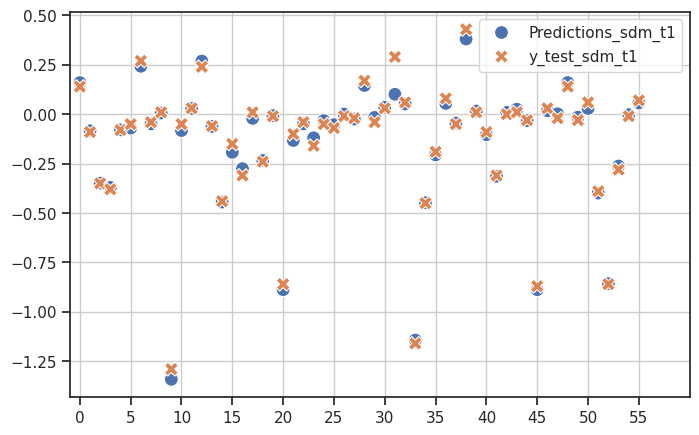

In [69]:
plt.figure(figsize=(8,5))
sns.set(style = 'ticks')

sns.scatterplot(results_sdm_t1, s=100)
x_ticks = np.arange(0, 60, 5)
plt.xlim(-1, 60)
plt.grid(True)
plt.xticks(x_ticks)

([<matplotlib.axis.XTick at 0x7fdaa492df00>,
 [Text(0, 0, '0'),
  Text(5, 0, '5'),
  Text(10, 0, '10'),
  Text(15, 0, '15'),
  Text(20, 0, '20'),
  Text(25, 0, '25'),
  Text(30, 0, '30'),
  Text(35, 0, '35'),
  Text(40, 0, '40'),
  Text(45, 0, '45'),
  Text(50, 0, '50'),
  Text(55, 0, '55')])

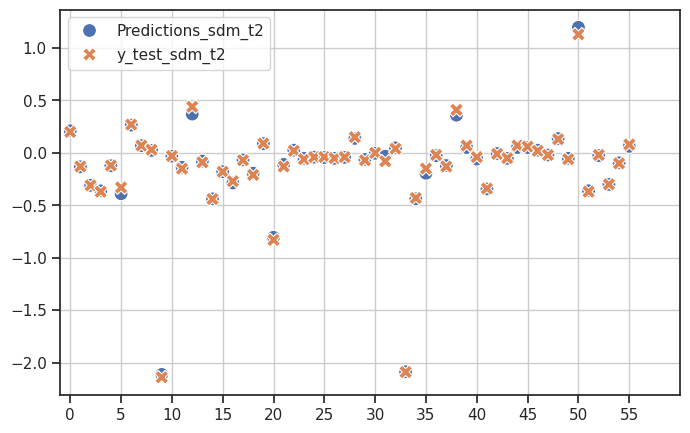

In [70]:
plt.figure(figsize=(8,5))
sns.set(style = 'ticks')

sns.scatterplot(results_sdm_t2, s=100)
x_ticks = np.arange(0, 60, 5)
plt.xlim(-1, 60)
plt.grid(True)
plt.xticks(x_ticks)

In [71]:
best_score_sdm_t1 = model_sdm_t1.get_best_score()
best_score_sdm_t2 = model_sdm_t2.get_best_score()


print(f"Best Score for SDM_T1: {best_score_sdm_t1}, \nBest Score for DDM_T2: {best_score_sdm_t2}")

Best Score for SDM_T1: {'learn': {'RMSE': 0.011435737724330763}, 'validation': {'RMSE': 0.03247540574277147}}, 
Best Score for DDM_T2: {'learn': {'RMSE': 0.0046442475696344115}, 'validation': {'RMSE': 0.021290784450001796}}


In [72]:
X_test_sdm_t1.head(10)

,ANGLE,SDM_T1,SDM_T1_std
30,15,39.87,39.73
124,13,39.84,39.93
196,10,39.84,40.19
127,10,39.81,40.19
216,13,39.85,39.93
234,18,40.01,40.06
144,16,39.85,39.58
203,3,40.15,40.19
254,21,40.05,40.04
143,17,42.56,43.85


In [73]:
X_test_sdm_t2.head(10)

,ANGLE,SDM_T2,SDM_T2_std
30,15,39.86,39.66
124,13,39.77,39.90
196,10,39.86,40.17
127,10,39.80,40.17
216,13,39.78,39.90
234,18,39.36,39.69
144,16,39.77,39.50
203,3,40.00,39.93
254,21,39.96,39.93
143,17,39.31,41.45


In [74]:
X_test_sdm_t1['SDM_T1_predicted'] = X_test_sdm_t1['SDM_T1'] + predictions_sdm_t1

X_test_sdm_t2['SDM_T2_predicted'] = X_test_sdm_t2['SDM_T2'] + predictions_sdm_t2

/tmp/ipykernel_76217/1411977918.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test_sdm_t1['SDM_T1_predicted'] = X_test_sdm_t1['SDM_T1'] + predictions_sdm_t1
/tmp/ipykernel_76217/1411977918.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test_sdm_t2['SDM_T2_predicted'] = X_test_sdm_t2['SDM_T2'] + predictions_sdm_t2


In [75]:
X_test_sdm_t1.head(10)

,ANGLE,SDM_T1,SDM_T1_std,SDM_T1_predicted
30,15,39.87,39.73,40.030381
124,13,39.84,39.93,39.756310
196,10,39.84,40.19,39.491612
127,10,39.81,40.19,39.439773
216,13,39.85,39.93,39.770864
234,18,40.01,40.06,39.939780
144,16,39.85,39.58,40.092898
203,3,40.15,40.19,40.101185
254,21,40.05,40.04,40.056473
143,17,42.56,43.85,41.218371


In [76]:
X_test_sdm_t2.head(10)

,ANGLE,SDM_T2,SDM_T2_std,SDM_T2_predicted
30,15,39.86,39.66,40.070564
124,13,39.77,39.90,39.637075
196,10,39.86,40.17,39.550478
127,10,39.80,40.17,39.438113
216,13,39.78,39.90,39.656873
234,18,39.36,39.69,38.969941
144,16,39.77,39.50,40.035218
203,3,40.00,39.93,40.068548
254,21,39.96,39.93,39.983595
143,17,39.31,41.45,37.197713


In [77]:
X_test_sdm_t1 = X_test_sdm_t1.merge(df[['ANGLE']], left_on='ANGLE', right_index=True, how='left')

X_test_sdm_t2 = X_test_sdm_t2.merge(df[['ANGLE']], left_on='ANGLE', right_index=True, how='left')

In [78]:
X_test_sdm_t1.head(10)

,ANGLE_x,SDM_T1,SDM_T1_std,SDM_T1_predicted,ANGLE_y
30,15,39.87,39.73,40.030381,-4.0
124,13,39.84,39.93,39.756310,-2.0
196,10,39.84,40.19,39.491612,1.0
127,10,39.81,40.19,39.439773,1.0
216,13,39.85,39.93,39.770864,-2.0
234,18,40.01,40.06,39.939780,-15.0
144,16,39.85,39.58,40.092898,-5.0
203,3,40.15,40.19,40.101185,20.0
254,21,40.05,40.04,40.056473,-30.0
143,17,42.56,43.85,41.218371,-10.0


In [79]:
X_test_sdm_t2.head(10)

,ANGLE_x,SDM_T2,SDM_T2_std,SDM_T2_predicted,ANGLE_y
30,15,39.86,39.66,40.070564,-4.0
124,13,39.77,39.90,39.637075,-2.0
196,10,39.86,40.17,39.550478,1.0
127,10,39.80,40.17,39.438113,1.0
216,13,39.78,39.90,39.656873,-2.0
234,18,39.36,39.69,38.969941,-15.0
144,16,39.77,39.50,40.035218,-5.0
203,3,40.00,39.93,40.068548,20.0
254,21,39.96,39.93,39.983595,-30.0
143,17,39.31,41.45,37.197713,-10.0


In [80]:
angle_order = [35, 30, 25, 20, 15, 10, 5, 4, 3, 2, 1, 0, -1, -2, -3, -4, -5, -10, -15, -20, -25, -30, -35]

X_test_sdm_t1['ANGLE_y_ordered'] = pd.Categorical(X_test_sdm_t1['ANGLE_y'], categories=angle_order, ordered=True)
X_test_sorted_sdm_t1 = X_test_sdm_t1.sort_values(by='ANGLE_y_ordered')



X_test_sdm_t2['ANGLE_y_ordered'] = pd.Categorical(X_test_sdm_t2['ANGLE_y'], categories=angle_order, ordered=True)
X_test_sorted_sdm_t2 = X_test_sdm_t2.sort_values(by='ANGLE_y_ordered')

In [81]:
X_test_sorted_sdm_t1.head(10)

,ANGLE_x,SDM_T1,SDM_T1_std,SDM_T1_predicted,ANGLE_y,ANGLE_y_ordered
68,0,40.19,40.18,40.206403,35.0,35
45,0,39.32,40.18,38.432081,35.0,35
114,0,40.15,40.18,40.117563,35.0,35
22,0,40.21,40.18,40.244925,35.0,35
206,0,39.31,40.18,38.422081,35.0,35
159,1,39.30,40.16,38.442460,30.0,30
158,2,40.18,40.19,40.177940,25.0,25
66,2,40.19,40.19,40.199498,25.0,25
204,2,40.16,40.19,40.145190,25.0,25
180,3,40.15,40.19,40.101185,20.0,20


In [82]:
X_test_sorted_sdm_t2.head(10)

,ANGLE_x,SDM_T2,SDM_T2_std,SDM_T2_predicted,ANGLE_y,ANGLE_y_ordered
68,0,40.11,40.04,40.160570,35.0,35
45,0,39.21,40.04,38.405152,35.0,35
114,0,40.11,40.04,40.160570,35.0,35
22,0,40.04,40.04,40.035833,35.0,35
206,0,40.10,40.04,40.150025,35.0,35
159,1,40.04,40.06,40.014550,30.0,30
158,2,40.04,40.14,39.945105,25.0,25
66,2,40.13,40.14,40.124133,25.0,25
204,2,40.08,40.14,40.028157,25.0,25
180,3,39.95,39.93,39.976316,20.0,20


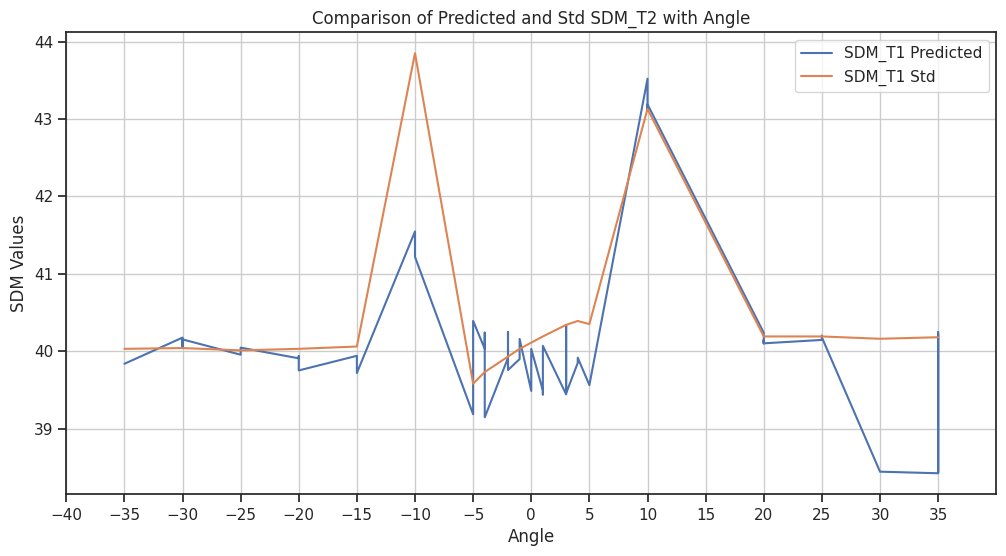

In [83]:
plt.figure(figsize=(12, 6))
plt.plot(X_test_sorted_sdm_t1['ANGLE_y_ordered'], X_test_sorted_sdm_t1['SDM_T1_predicted'], label='SDM_T1 Predicted')
plt.plot(X_test_sorted_sdm_t1['ANGLE_y_ordered'], X_test_sorted_sdm_t1['SDM_T1_std'], label='SDM_T1 Std')

x_ticks = np.arange(-40, 40, 5)
plt.xlim(-40,40)
plt.grid(True)
plt.xticks(x_ticks)

plt.xlabel('Angle')
plt.ylabel('SDM Values')
plt.title('Comparison of Predicted and Std SDM_T2 with Angle')
plt.legend()
plt.show()

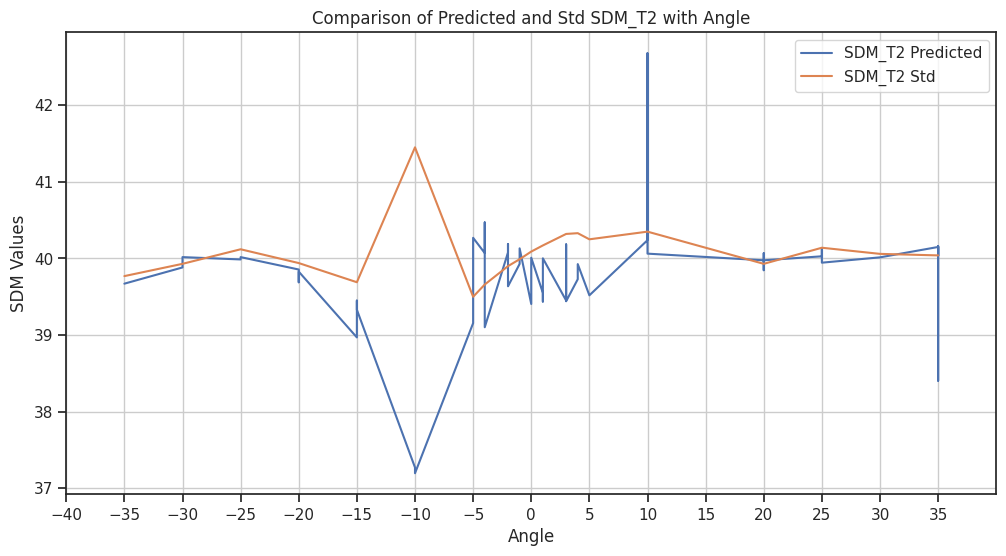

In [84]:
plt.figure(figsize=(12, 6))
plt.plot(X_test_sorted_sdm_t2['ANGLE_y_ordered'], X_test_sorted_sdm_t2['SDM_T2_predicted'], label='SDM_T2 Predicted')
plt.plot(X_test_sorted_sdm_t2['ANGLE_y_ordered'], X_test_sorted_sdm_t2['SDM_T2_std'], label='SDM_T2 Std')

x_ticks = np.arange(-40, 40, 5)
plt.xlim(-40,40)
plt.grid(True)
plt.xticks(x_ticks)

plt.xlabel('Angle')
plt.ylabel('SDM Values')
plt.title('Comparison of Predicted and Std SDM_T2 with Angle')
plt.legend()
plt.show()

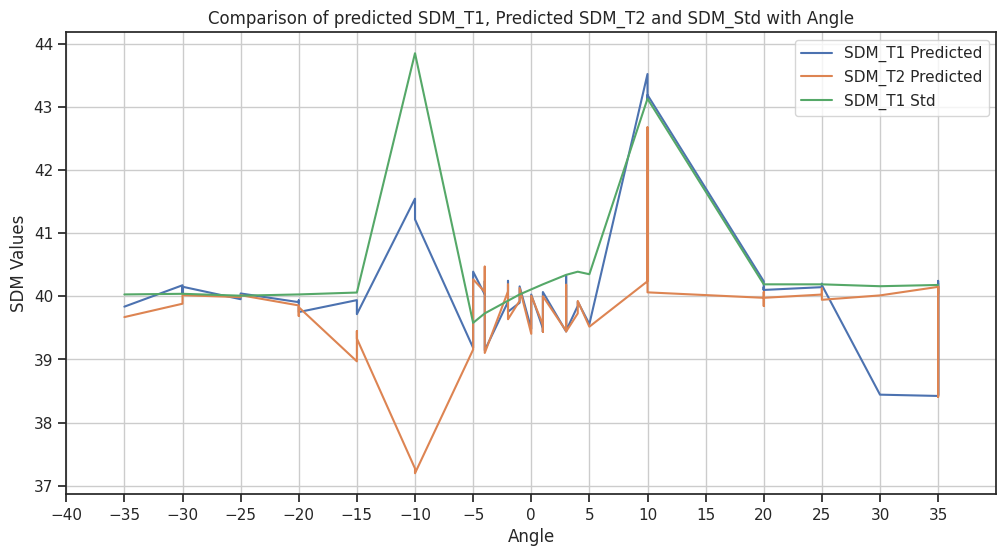

In [85]:
plt.figure(figsize=(12, 6))
plt.plot(X_test_sorted_sdm_t1['ANGLE_y_ordered'], X_test_sorted_sdm_t1['SDM_T1_predicted'], label='SDM_T1 Predicted')
plt.plot(X_test_sorted_sdm_t2['ANGLE_y_ordered'], X_test_sorted_sdm_t2['SDM_T2_predicted'], label='SDM_T2 Predicted')
plt.plot(X_test_sorted_sdm_t1['ANGLE_y_ordered'], X_test_sorted_sdm_t1['SDM_T1_std'], label='SDM_T1 Std')


# Customizing the x-axis
x_ticks = np.arange(-40, 40, 5)
plt.xlim(-40, 40)
plt.xticks(x_ticks)

# Adding grid lines for better readability
plt.grid(True)

plt.xlabel('Angle')
plt.ylabel('SDM Values')
plt.title('Comparison of predicted SDM_T1, Predicted SDM_T2 and SDM_Std with Angle')
plt.legend()
plt.show()